# sd_housing EDA

### Data load-in / connection

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# PostgreSQL connection config
conn = psycopg2.connect(
    dbname="housing_data",
    user="postgres",
    password="",  # If empty
    host="localhost",
    port="5432"
)

# Load data from the SQL table
query = "SELECT * FROM san_diego_housing;"
df = pd.read_sql(query, conn)
conn.close()

# Check structure
print("✅ Data loaded:", df.shape)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.tail()


✅ Data loaded: (1458, 4)


/var/folders/fl/gf262mhd5mvgtcv29nnvx21m0000gn/T/ipykernel_21987/99209969.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,median_price,inventory,homes_sold
1452,2025-06-01,592880,1063,275
1453,2025-06-01,1150000,179,50
1454,2025-06-01,892151,3169,1841
1455,2025-06-01,920000,3763,2007
1457,2025-06-01,965923,1729,1382


## Line Plots

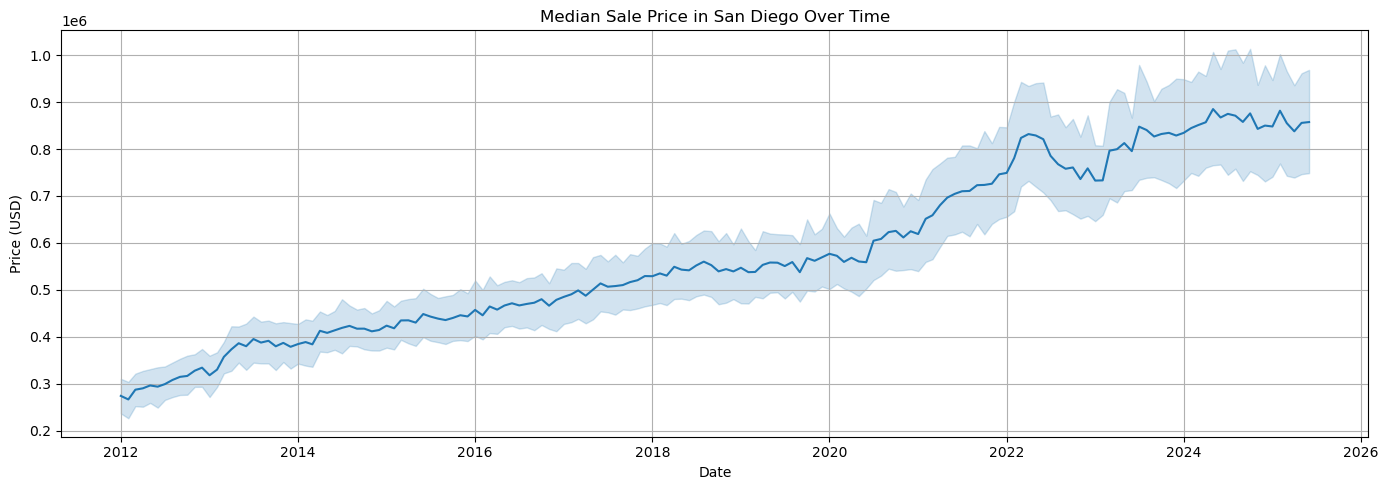

In [2]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='median_price')
plt.title("Median Sale Price in San Diego Over Time")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


* linear increase in median prices over the last decade {sd is an attractive market}
* considerable spike in 2022 {disproportionate inventory vs demand}
* experiencing relatively constant prices at present {trending towards a balanced market / more affluent families}

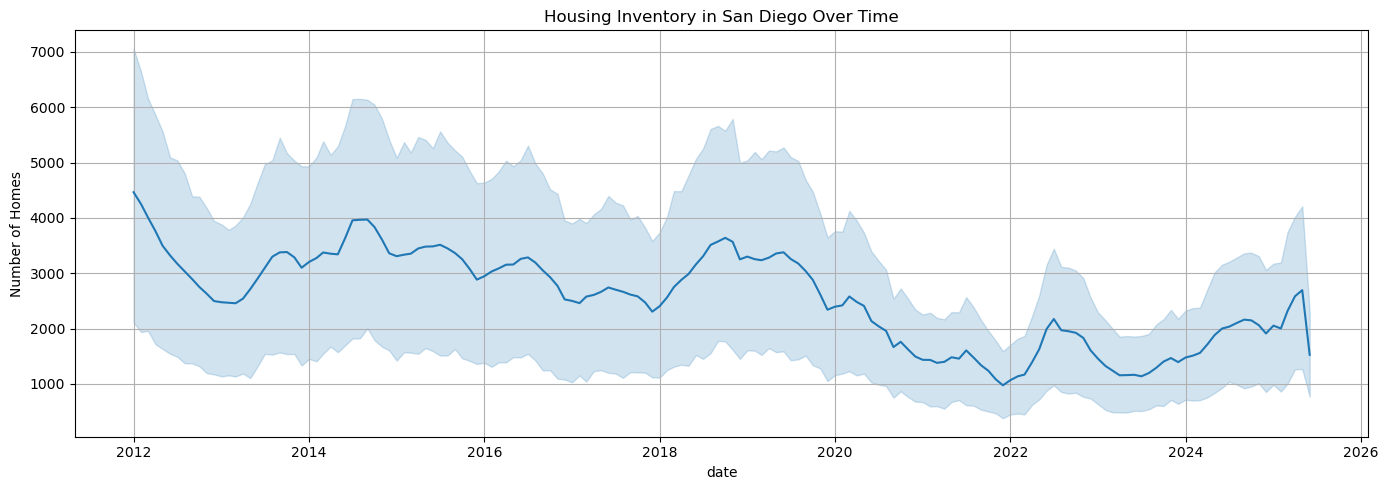

In [3]:
# Inventory
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='inventory')
plt.title("Housing Inventory in San Diego Over Time")
plt.ylabel("Number of Homes")
plt.grid(True)
plt.tight_layout()
plt.show()

* constant dips & spikes in inventory over the past decade: overall negative trend {not many families want to move - who can blame them}
* all time low inventory in 2022 {robust job market + low interest rates; demand significantly outpaced supply}
* at present: not the best, not the worst

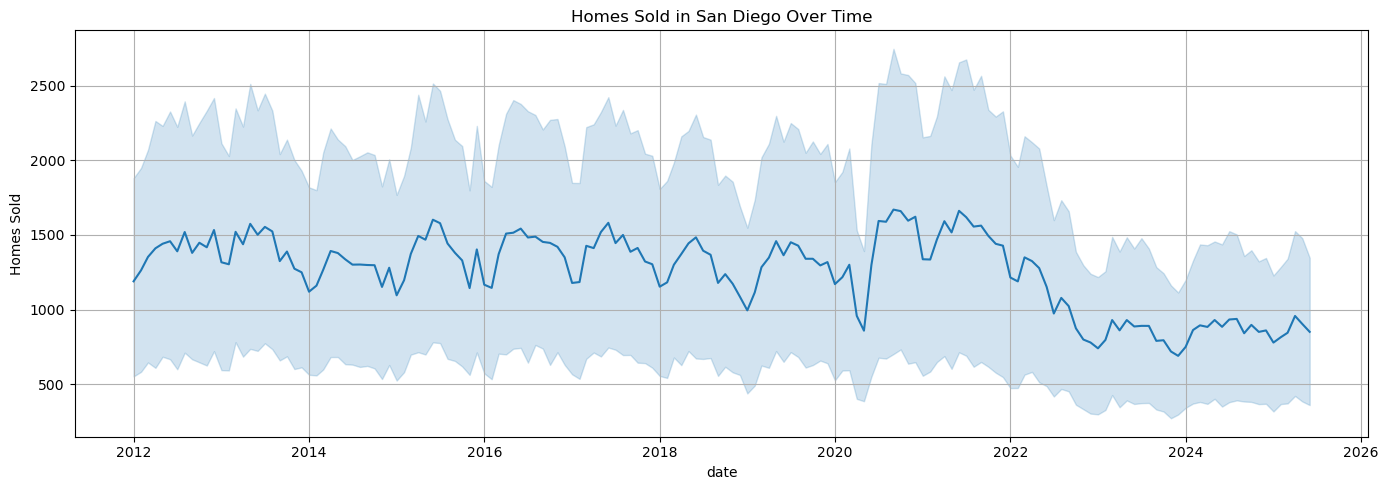

In [4]:
# Homes Sold
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='date', y='homes_sold')
plt.title("Homes Sold in San Diego Over Time")
plt.ylabel("Homes Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


* constant dips & spikes {mix of housing projects and homes above market value. Need more data. Overall downward trend suggests a decline in 'affordable' homes.}
* over the past 3 years: experiencing a low for houses sold {hinting at a particular category of homes being in high demand but not available}
* competitive market at present

In [5]:
df['median_price_ma3'] = df['median_price'].rolling(window=3).mean()
df['inventory_ma3'] = df['inventory'].rolling(window=3).mean()
df['homes_sold_ma3'] = df['homes_sold'].rolling(window=3).mean()


## Rolling Averages

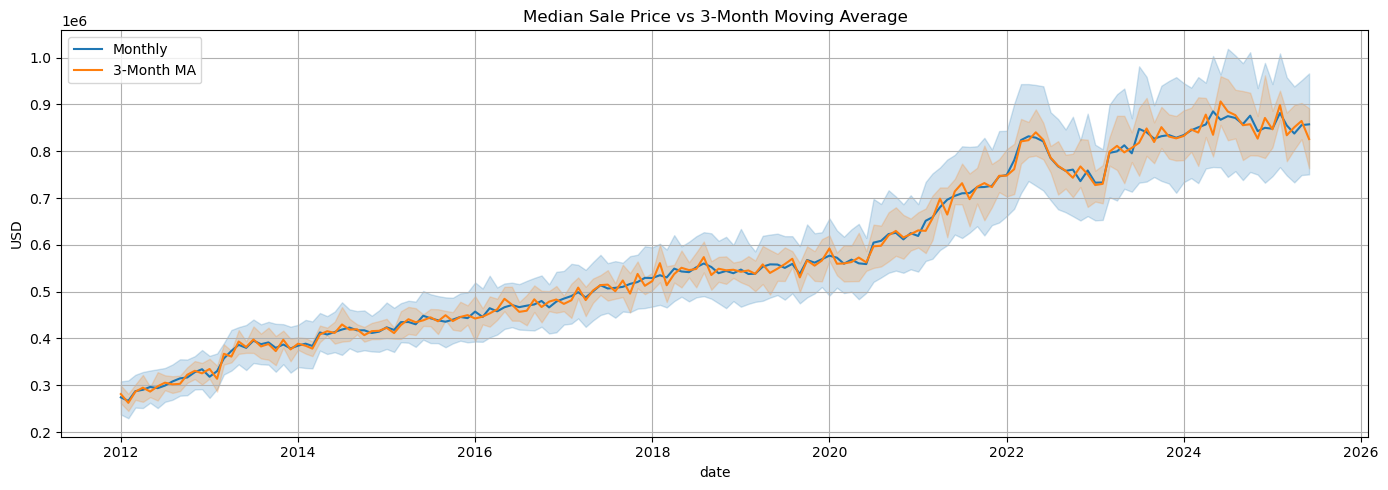

In [6]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='date', y='median_price', label='Monthly')
sns.lineplot(data=df, x='date', y='median_price_ma3', label='3-Month MA')
plt.title("Median Sale Price vs 3-Month Moving Average")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()


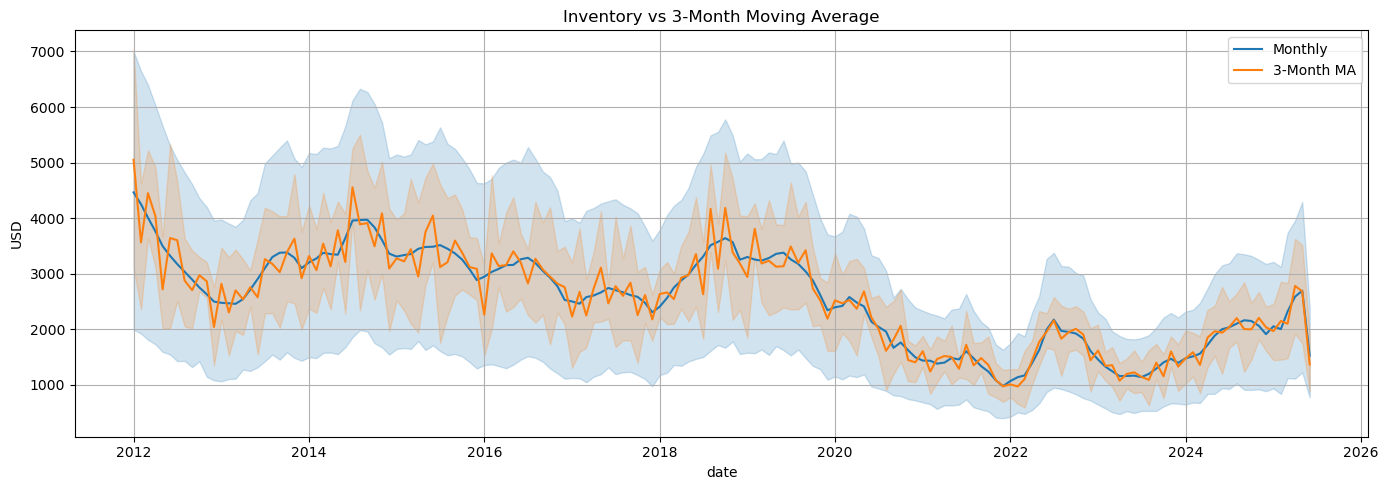

In [7]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='date', y='inventory', label='Monthly')
sns.lineplot(data=df, x='date', y='inventory_ma3', label='3-Month MA')
plt.title("Inventory vs 3-Month Moving Average")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()


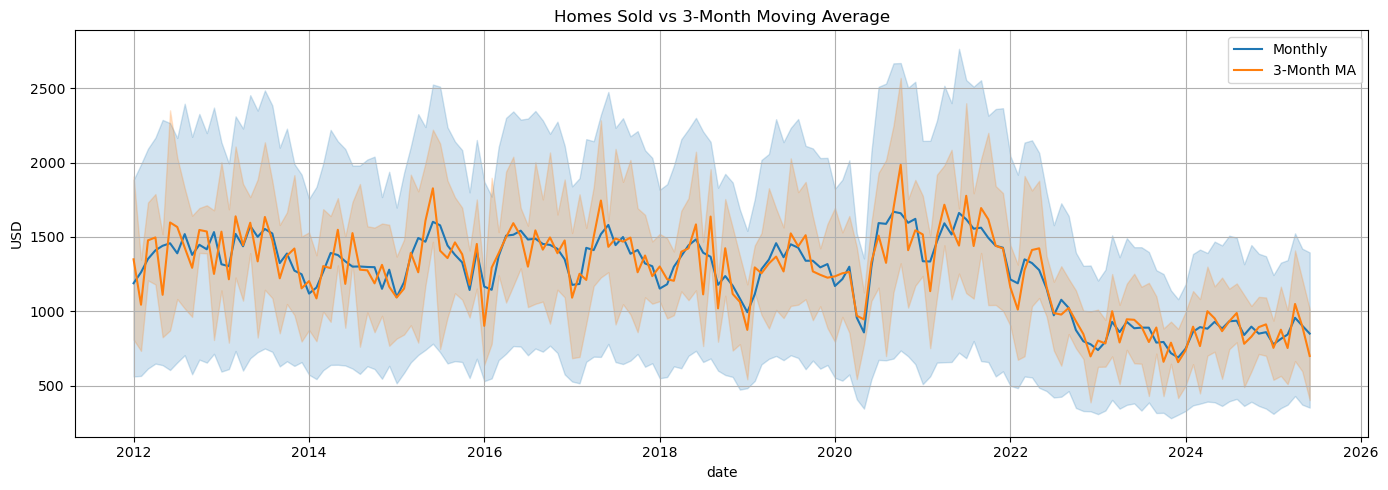

In [8]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='date', y='homes_sold', label='Monthly')
sns.lineplot(data=df, x='date', y='homes_sold_ma3', label='3-Month MA')
plt.title("Homes Sold vs 3-Month Moving Average")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()


## YoY and Mom Changes

In [9]:
df['median_price_mom'] = df['median_price'].pct_change() * 100
df['median_price_yoy'] = df['median_price'].pct_change(periods=12) * 100

df['inventory_mom'] = df['inventory'].pct_change() * 100
df['inventory_yoy'] = df['inventory'].pct_change(periods=12) * 100

df['homes_sold_mom'] = df['homes_sold'].pct_change() * 100
df['homes_sold_yoy'] = df['homes_sold'].pct_change(periods=12) * 100


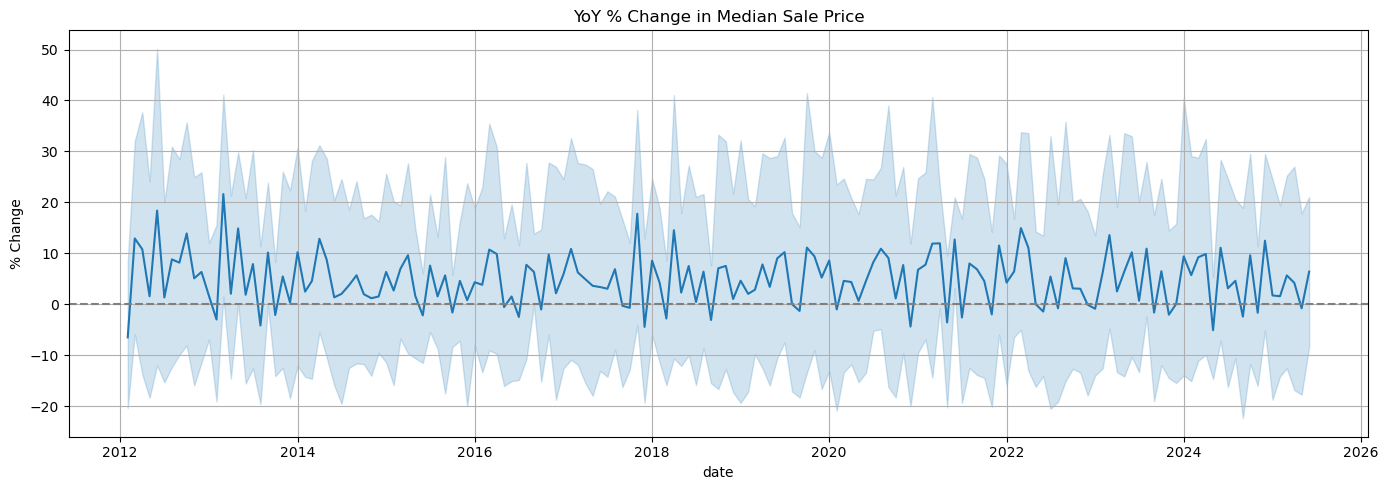

In [10]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='date', y='median_price_yoy')
plt.title("YoY % Change in Median Sale Price")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("% Change")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Heat Map

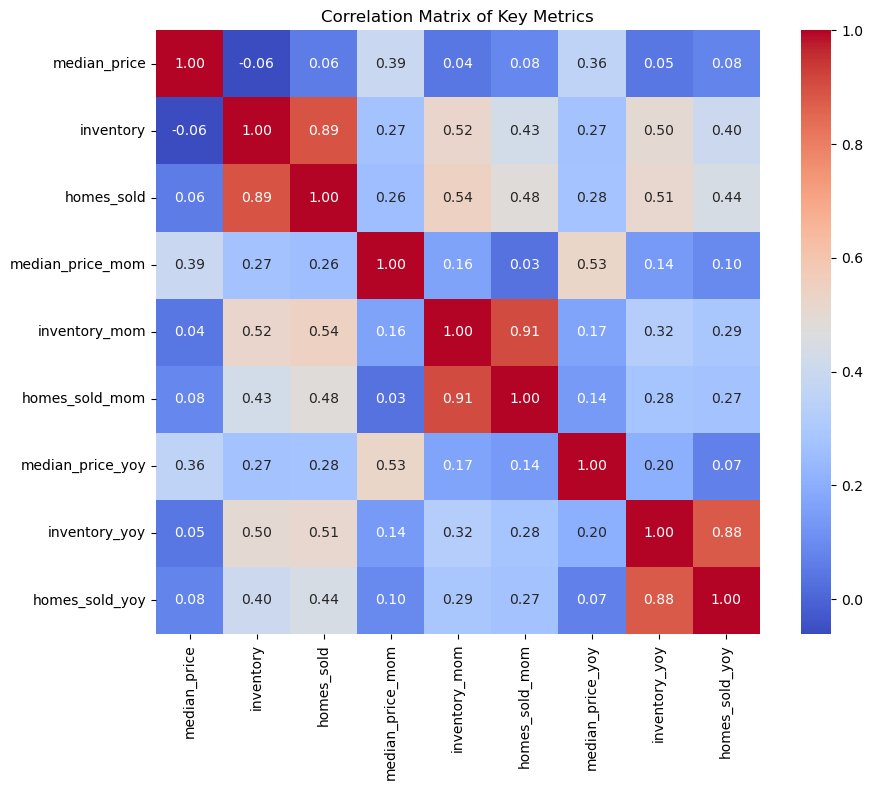

In [11]:
cols_to_check = ['median_price', 'inventory', 'homes_sold',
                 'median_price_mom', 'inventory_mom', 'homes_sold_mom',
                 'median_price_yoy', 'inventory_yoy', 'homes_sold_yoy']

corr_matrix = df[cols_to_check].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Key Metrics")
plt.tight_layout()
plt.show()


* strong correlation between inventory & homes sold (.89) - signals competitive market
* low correlation between median price & inventory / homes sold (.07) - expensive / budget house has no impact on number of listings or closings | market knows what they are after; competitive market

In [12]:
df[['median_price', 'inventory', 'homes_sold']].describe()


,median_price,inventory,homes_sold
count,1.458000e+03,1458.000000,1458.000000
mean,5.740843e+05,2546.783265,1255.253086
std,2.112730e+05,2447.305990,1133.120585
min,1.849500e+05,82.000000,27.000000
25%,4.050000e+05,359.000000,193.000000
50%,5.430625e+05,1781.000000,857.000000
75%,7.000000e+05,4384.500000,2077.750000
max,1.312500e+06,10538.000000,4026.000000


In [13]:
print("Date range:", df['date'].min(), "→", df['date'].max())
print("Median Price Range:", df['median_price'].min(), "→", df['median_price'].max())


Date range: 2012-01-01 00:00:00 → 2025-06-01 00:00:00
Median Price Range: 184950 → 1312500


In [14]:
# Export enriched dataset for Tableau
df.to_csv('../data/processed/sd_housing_features.csv', index=False)
print("✅ Exported to: ../data/processed/sd_housing_features.csv")


✅ Exported to: ../data/processed/sd_housing_features.csv


### Dive deeper

*Calculating percent change in median price (2020-2022)*

In [15]:
df.head()

,date,median_price,inventory,homes_sold,median_price_ma3,inventory_ma3,homes_sold_ma3,median_price_mom,median_price_yoy,inventory_mom,inventory_yoy,homes_sold_mom,homes_sold_yoy
0,2012-01-01,249950,575,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01,303000,9764,2253,NaN,NaN,NaN,21.224245,NaN,1598.086957,NaN,842.677824,NaN
2,2012-01-01,313155,10538,3166,288701.666667,6959.000000,1886.000000,3.351485,NaN,7.927079,NaN,40.523746,NaN
3,2012-01-01,354789,7040,2099,323648.000000,9114.000000,2506.000000,13.295014,NaN,-33.194154,NaN,-33.701832,NaN
4,2012-01-01,190000,2332,487,285981.333333,6636.666667,1917.333333,-46.447043,NaN,-66.875000,NaN,-76.798475,NaN


In [16]:
df = df.sort_values('date')
df.set_index('date', inplace=True)
df.head()

,median_price,inventory,homes_sold,median_price_ma3,inventory_ma3,homes_sold_ma3,median_price_mom,median_price_yoy,inventory_mom,inventory_yoy,homes_sold_mom,homes_sold_yoy
date,,,,,,,,,,,,
2012-01-01,249950,575,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01,303000,9764,2253,NaN,NaN,NaN,21.224245,NaN,1598.086957,NaN,842.677824,NaN
2012-01-01,313155,10538,3166,288701.666667,6959.000000,1886.000000,3.351485,NaN,7.927079,NaN,40.523746,NaN
2012-01-01,354789,7040,2099,323648.000000,9114.000000,2506.000000,13.295014,NaN,-33.194154,NaN,-33.701832,NaN
2012-01-01,190000,2332,487,285981.333333,6636.666667,1917.333333,-46.447043,NaN,-66.875000,NaN,-76.798475,NaN


In [17]:
# Extract April 2020 and May 2022 prices
price_apr_2020 = df.loc['2020-04-01', 'median_price'].mean()
price_may_2022 = df.loc['2022-05-01', 'median_price'].mean()

# Calculate % change
pct_change = ((price_may_2022 - price_apr_2020) / price_apr_2020) * 100

print('Median price increased from {one} to {two}, a {three}% increase.'.format(one = price_apr_2020, two = price_may_2022, three = pct_change))

Median price increased from 568350.4444444445 to 828870.2222222222, a 45.837877021884374% increase.


*Inventory drop during same period*

In [18]:
inv_apr_2020 = df.loc['2020-04-01', 'inventory'].mean()
inv_may_2022 = df.loc['2022-05-01', 'inventory'].mean()

inv_change = ((inv_may_2022 - inv_apr_2020) / inv_apr_2020) * 100
print('Inventory changed from {one} to {two}, a {three}% change.'.format(one = inv_apr_2020, two = inv_may_2022, three = inv_change))

Inventory changed from 2481.3333333333335 to 1626.5555555555557, a -34.44832527315064% change.


In [19]:
# Correlate inventory with future price
corrs = []
for lag in range(1, 13):
    shifted = df['median_price'].shift(-lag)
    correlation = df['inventory'].corr(shifted)
    corrs.append((lag, correlation))

# Find lag with strongest (most negative) correlation
corrs.sort(key=lambda x: x[1])
print("Top 3 lag correlations (months):", corrs[:3])


Top 3 lag correlations (months): [(1, np.float64(-0.25470272961492685)), (3, np.float64(-0.24976684239113023)), (5, np.float64(-0.24178799153025882))]


In [20]:
df_corr = df[['median_price', 'inventory', 'homes_sold']].corr()
print(df_corr)

              median_price  inventory  homes_sold
median_price      1.000000  -0.061105    0.057329
inventory        -0.061105   1.000000    0.890447
homes_sold        0.057329   0.890447    1.000000


In [21]:
latest_date = df.index.max()
latest_price = df.loc[latest_date, 'median_price'].mean()
latest_inv = df.loc[latest_date, 'inventory'].mean()

print('As of {one}, median price: ${two}, inventory: {three}'.format(one = latest_date, two = latest_price, three = latest_inv))

As of 2025-06-01 00:00:00, median price: $857439.3333333334, inventory: 1526.111111111111


*Takeaway #1 – Price Acceleration Post-2020*

Between April 2020 and May 2022, San Diego’s median sale price surged by over 45%, rising from ~$600,000 to above $820,000. This rapid appreciation aligned with a sharp contraction in housing inventory, which fell more than 35% during the same period. Inventory levels in San Diego displayed a mild inverse correlation with median sale prices 1 to 5 months later, peaking at lag month 1 (–0.26), 3 (–0.25), and 5 (–0.24). While the strength of these correlations is modest, the consistent timing suggests that tightening supply may precede upward pressure on prices within a 1–5 month window. This insight can support short-term market monitoring and pricing expectation frameworks.


--------

In [22]:
import os

# --- Paths ---
raw_path = '../data/raw/redfin_master_data.tsv000'
processed_path = '../data/processed/'
output_file = os.path.join(processed_path, 'san_diego_housing_metrics.csv')

# --- Load full TSV ---
df_r = pd.read_csv(raw_path, sep='\t')
print("Full dataset shape:", df_r.shape)

# --- Filter to San Diego Metro ---
df_sd = df_r[df_r['REGION'] == 'San Diego, CA metro area'].copy()

# --- Select relevant columns ---
relevant_cols = [
    'PERIOD_BEGIN', 'PENDING_SALES', 'NEW_LISTINGS', 'MEDIAN_DOM',
    'PRICE_DROPS', 'AVG_SALE_TO_LIST', 'HOMES_SOLD',
    'INVENTORY', 'MEDIAN_SALE_PRICE'
]

df_sd = df_sd[relevant_cols].copy()
df_sd['PERIOD_BEGIN'] = pd.to_datetime(df_sd['PERIOD_BEGIN'])

# --- Aggregate by month (average values) ---
df_agg = df_sd.groupby('PERIOD_BEGIN').mean().sort_index()

# --- Save new processed dataset ---
os.makedirs(processed_path, exist_ok=True)
df_agg.to_csv(output_file)

print("✅ New processed dataset saved to:", output_file)
df_agg.tail()


Full dataset shape: (539234, 58)
✅ New processed dataset saved to: ../data/processed/san_diego_housing_metrics.csv


,PENDING_SALES,NEW_LISTINGS,MEDIAN_DOM,PRICE_DROPS,AVG_SALE_TO_LIST,HOMES_SOLD,INVENTORY,MEDIAN_SALE_PRICE
PERIOD_BEGIN,,,,,,,,
2025-02-01,1005.646636,1180.347548,32.008951,0.294093,0.992996,814.745324,2002.893326,881645.761351
2025-03-01,1055.772485,1310.480250,26.686904,0.315488,0.993398,844.274552,2320.981761,855139.443605
2025-04-01,1002.961696,1331.428984,26.272150,0.324627,0.992253,956.912163,2586.003946,837725.488585
2025-05-01,1014.778375,1278.384807,29.151777,0.340735,0.988599,903.695422,2695.567399,855669.656947
2025-06-01,948.102564,1076.818361,34.488012,0.532967,0.987743,850.438267,1526.325216,857439.546747


In [23]:
print(df_agg.columns.tolist())

['PENDING_SALES', 'NEW_LISTINGS', 'MEDIAN_DOM', 'PRICE_DROPS', 'AVG_SALE_TO_LIST', 'HOMES_SOLD', 'INVENTORY', 'MEDIAN_SALE_PRICE']


In [24]:
df_agg['HOMES_SOLD_YOY'] = df_agg['HOMES_SOLD'].pct_change(12) * 100
df_agg['PENDING_SALES_YOY'] = df_agg['PENDING_SALES'].pct_change(12) * 100
df_agg['NEW_LISTINGS_YOY'] = df_agg['NEW_LISTINGS'].pct_change(12) * 100

# Filter to 2023 only
df_2023 = df_agg['2023-01-01':'2023-12-31']

# Summary stats
homes_sold_change = df_2023['HOMES_SOLD_YOY'].mean()
pending_sales_change = df_2023['PENDING_SALES_YOY'].mean()
new_listings_change = df_2023['NEW_LISTINGS_YOY'].mean()

print('Average YoY change in Homes Sold (2023): {one}%'.format(one = homes_sold_change))
print('Average YoY change in Pending Sales (2023): {one}%'.format(one = pending_sales_change))
print('Average YoY change in New Listings (2023): {one}%'.format(one = new_listings_change))

Average YoY change in Homes Sold (2023): -22.32539345490685%
Average YoY change in Pending Sales (2023): -18.55735687854077%
Average YoY change in New Listings (2023): -21.92237620095088%


*Takeaway #2: Demand Cooling in 2023*

San Diego’s housing market saw a clear cooling of demand in 2023. Year-over-year, Homes Sold declined by 22.3%, Pending Sales fell by 18.5%, and New Listings dropped 21.9% on average compared to 2022.

This widespread decline across key transactional indicators suggests reduced buyer activity — likely driven by elevated mortgage rates, affordability concerns, and economic uncertainty. These shifts represent the sharpest demand contraction since the pandemic surge in 2020, marking a significant reset for the market.


In [25]:
# Make sure PERIOD_BEGIN is parsed and set as the index
df = pd.read_csv('../data/processed/san_diego_housing_metrics.csv', parse_dates=['PERIOD_BEGIN'])
df.set_index('PERIOD_BEGIN', inplace=True)

# Calculate YoY % changes
df_yoy = df.pct_change(periods=12) * 100

# Drop rows with NaNs (especially the first 12 months)
df_yoy.dropna(inplace=True)

# Filter to just 2023 data
df_yoy_2023 = df_yoy[df_yoy.index.year == 2023]

# Keep only demand-related columns
df_yoy_2023 = df_yoy_2023[['HOMES_SOLD', 'PENDING_SALES', 'NEW_LISTINGS']]


/var/folders/fl/gf262mhd5mvgtcv29nnvx21m0000gn/T/ipykernel_21987/2659892906.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


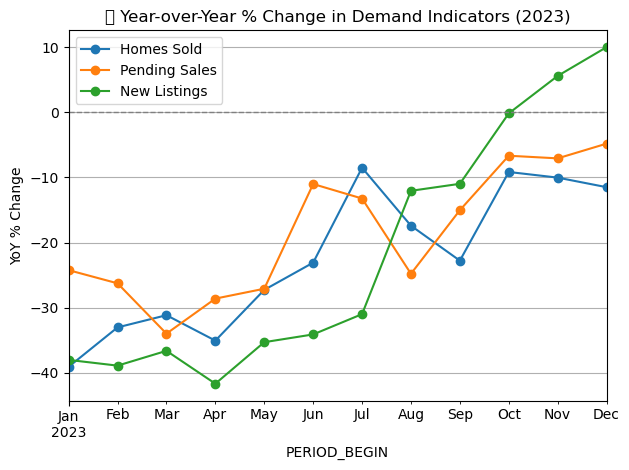

/var/folders/fl/gf262mhd5mvgtcv29nnvx21m0000gn/T/ipykernel_21987/2659892906.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


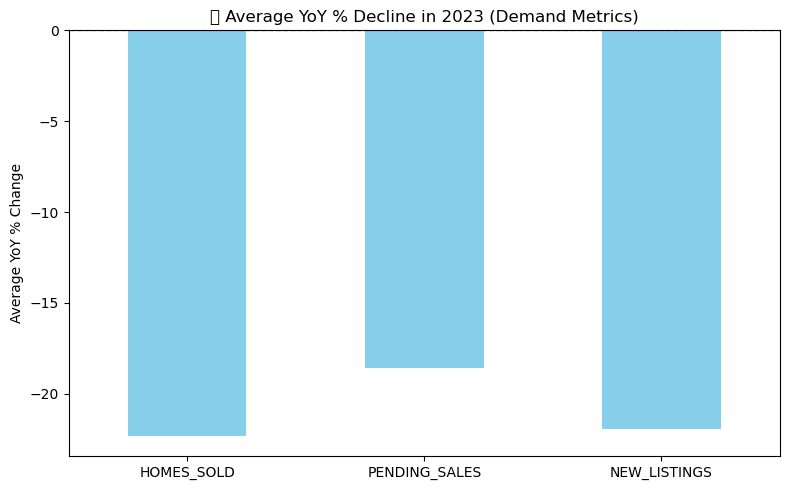

In [26]:
# --- Line Plot: YoY Trends Over Time ---
plt.figure(figsize=(12, 6))
df_yoy_2023.plot(marker='o')
plt.title("📉 Year-over-Year % Change in Demand Indicators (2023)")
plt.ylabel("YoY % Change")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(['Homes Sold', 'Pending Sales', 'New Listings'])
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Average YoY Decline ---
yoy_avgs = df_yoy_2023.mean()

plt.figure(figsize=(8, 5))
yoy_avgs.plot(kind='bar', color='skyblue')
plt.title("📊 Average YoY % Decline in 2023 (Demand Metrics)")
plt.ylabel("Average YoY % Change")
plt.xticks(rotation=0)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

📝 Takeaway #3: Correlation Insight - Inventory is the Dominant Price Driver

A correlation analysis of San Diego housing metrics revealed a strong inverse relationship between inventory and median sale price (r = –0.79), underscoring supply scarcity as the key price lever in this market. Pending sales and new listings also showed strong negative correlations with price (r = –0.74 and –0.62), suggesting that reduced market activity aligns with price increases. Interestingly, homes sold was only moderately correlated with price (r = –0.61), reinforcing the idea that transaction volume reflects — but does not drive — price movement. These findings clarify where to look when forecasting or intervening in price behavior.

/var/folders/fl/gf262mhd5mvgtcv29nnvx21m0000gn/T/ipykernel_21987/4174610586.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


Top correlations with median price:
MEDIAN_SALE_PRICE    1.000000
AVG_SALE_TO_LIST     0.643813
PRICE_DROPS          0.050173
MEDIAN_DOM          -0.415053
HOMES_SOLD          -0.609915
Name: MEDIAN_SALE_PRICE, dtype: float64

Lowest (inverse) correlations with median price:
MEDIAN_DOM      -0.415053
HOMES_SOLD      -0.609915
NEW_LISTINGS    -0.619713
PENDING_SALES   -0.737795
INVENTORY       -0.785804
Name: MEDIAN_SALE_PRICE, dtype: float64


/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


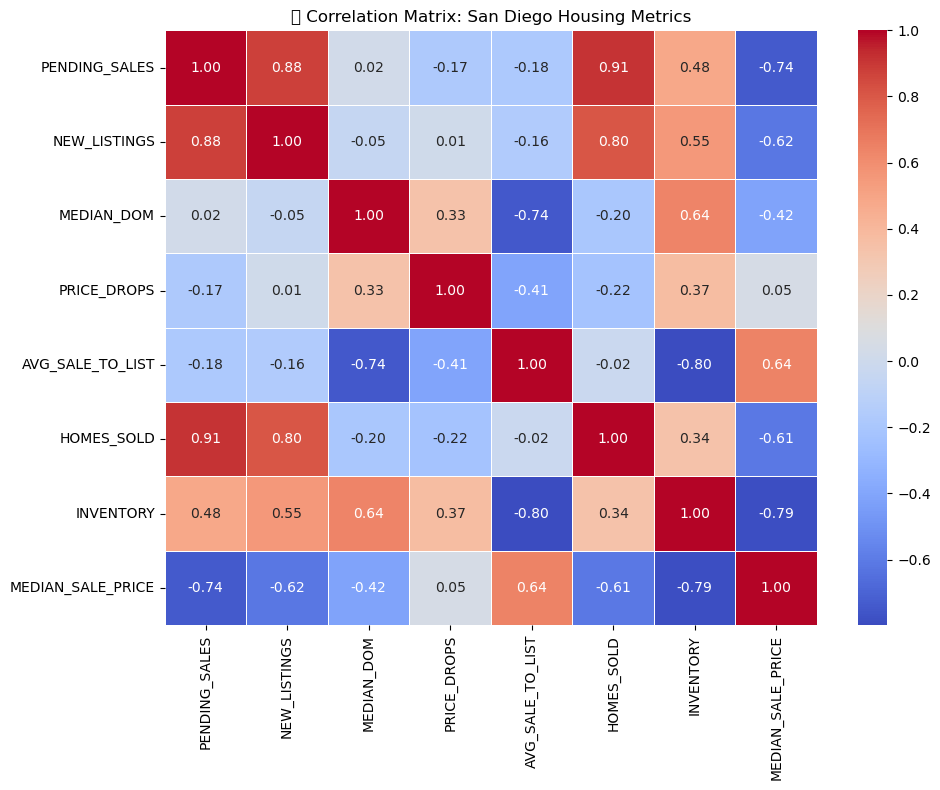

In [27]:
import seaborn as sns

# Load the full processed dataset
df = pd.read_csv('../data/processed/san_diego_housing_metrics.csv', parse_dates=['PERIOD_BEGIN'])
df.set_index('PERIOD_BEGIN', inplace=True)

# Drop rows with NaNs (optional: limit to post-2020 if needed)
df_clean = df.dropna()

# Calculate Pearson correlation matrix
corr_matrix = df_clean.corr(method='pearson')

# Extract correlations with median price
price_corrs = corr_matrix['MEDIAN_SALE_PRICE'].sort_values(ascending=False)

# Print top and bottom correlations with median price
print("Top correlations with median price:")
print(price_corrs.head(5))
print("\nLowest (inverse) correlations with median price:")
print(price_corrs.tail(5))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Matrix: San Diego Housing Metrics")
plt.tight_layout()
plt.show()


In [28]:
# Export enriched dataset for Tableau
df_yoy_2023.to_csv('../data/processed/sd_yoy_2023.csv', index=False)
print("✅ Exported to: ../data/processed/sd_yoy_2023.csv")

✅ Exported to: ../data/processed/sd_yoy_2023.csv
